In [1]:
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image as Img
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras import layers, models, losses, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator


BASE_DATA_DIR = "./dataset/newhuman1"

2024-06-18 16:13:42.980848: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


CHECK THE FILE FOLDER AND ALL THE SUBDIRECTORIES FOR THE TRAINING DATASET

In [2]:

base_dir_train = f'{BASE_DATA_DIR}/train'

if os.path.exists(base_dir_train):
    contents = os.listdir(base_dir_train)
    print("Contents of the directory:", contents)
else:
    print("The directory does not exist.")

Contents of the directory: ['list_attr_celeba.csv', 'list_eval_partition.csv', 'list_bbox_celeba.csv', 'list_landmarks_align_celeba.csv', 'img_align_celeba']


CHECK THE FILE FOLDER AND ALL THE SUBDIRECTORIES FOR THE test DATASET

In [3]:
base_dir_test = f'{BASE_DATA_DIR}/test'


if os.path.exists(base_dir_test):
    contents = os.listdir(base_dir_test)
    print("Contents of the directory:", contents)
else:
    print("The directory does not exist.")

Contents of the directory: ['list_attr_celeba_test.csv', 'list_bbox_celeba_test.csv', 'list_landmarks_align_celeba_test.csv', 'list_eval_partition_test.csv', 'img_align_celeba_test']


DEFINE THE PATH OF THE DATASET AND CHECK THE DATAFRAME FOR THE TRAINING DATASET

In [4]:
images_dir = os.path.join(base_dir_train, 'img_align_celeba')
landmarks_file = os.path.join(base_dir_train, 'list_landmarks_align_celeba.csv')
bbox_file = os.path.join(base_dir_train, 'list_bbox_celeba.csv')
partition_file = os.path.join(base_dir_train, 'list_eval_partition.csv')
attributes_file = os.path.join(base_dir_train, 'list_attr_celeba.csv')

df_landmarks = pd.read_csv(landmarks_file)

print(df_landmarks.head())

     image_id  lefteye_x  lefteye_y  righteye_x  righteye_y  nose_x  nose_y  \
0  000002.jpg         69        110         107         112      81     135   
1  000003.jpg         76        112         104         106     108     128   
2  000004.jpg         72        113         108         108     101     138   
3  000005.jpg         66        114         112         112      86     119   
4  000006.jpg         71        111         106         110      94     131   

   leftmouth_x  leftmouth_y  rightmouth_x  rightmouth_y  
0           70          151           108           153  
1           74          156            98           158  
2           71          155           101           151  
3           71          147           104           150  
4           74          154           102           153  


DEFINE THE PATH OF THE DATASET AND CHECK THE DATAFRAME FOR THE TESTING DATASET

In [5]:
images_dir_test = os.path.join(base_dir_test, 'img_align_celeba_test')
landmarks_file_test = os.path.join(base_dir_test, 'list_landmarks_align_celeba_test.csv')
bbox_file_test = os.path.join(base_dir_test, 'list_bbox_celeba_test.csv')
partition_file_test = os.path.join(base_dir_test, 'list_eval_partition_test.csv')
attributes_file_test = os.path.join(base_dir_test, 'list_attr_celeba_test.csv')


df_landmarks = pd.read_csv(landmarks_file_test)

print(df_landmarks.head())

     image_id  lefteye_x  lefteye_y  righteye_x  righteye_y  nose_x  nose_y  \
0  001509.jpg         67        112         109         112      85     140   
1  001510.jpg         67        112         110         112      91     132   
2  001511.jpg         70        112         108         110      96     137   
3  001512.jpg         69        111         108         111      85     130   
4  001513.jpg         70        111         108         111      93     135   

   leftmouth_x  leftmouth_y  rightmouth_x  rightmouth_y  
0           66          150           112           151  
1           71          151           105           150  
2           74          153           101           151  
3           74          152           103           152  
4           74          153           103           152  


CONFIRMING THE NUMBER OF IMAGES AND VIEWING 5 IMAGES FOR THE TRAINING DATASET

Found 4079 images.


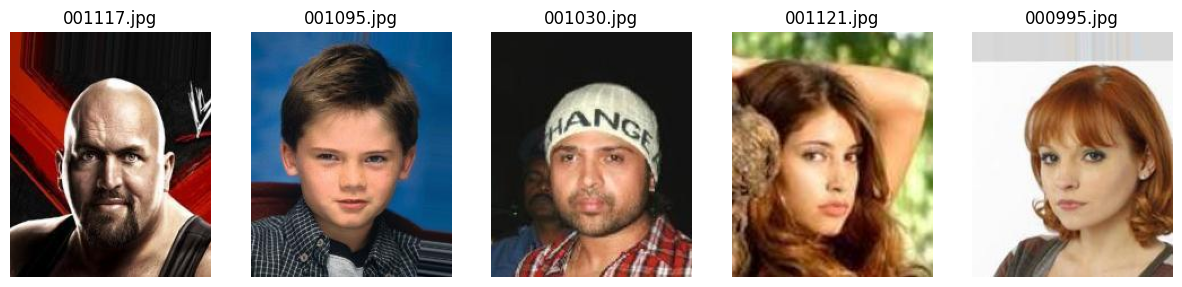

In [6]:
if os.path.exists(images_dir):
    image_files = os.listdir(images_dir)
    print(f"Found {len(image_files)} images.")
else:
    print("Images directory not found. Check the path.")

plt.figure(figsize=(15, 10))
num_images_to_show = 5
for i, image_name in enumerate(image_files[:num_images_to_show]):
    image_path = os.path.join(images_dir, image_name)
    if os.path.exists(image_path):
        image = Image.open(image_path)
        plt.subplot(1, num_images_to_show, i + 1)
        plt.imshow(image)
        plt.title(image_name)
        plt.axis('off')
    else:
        print(f"Image not found: {image_path}")
plt.show()

CONFIRMING THE NUMBER OF IMAGES AND VIEWING 5 IMAGES FOR THE TESTING DATASET

Found 506 images.


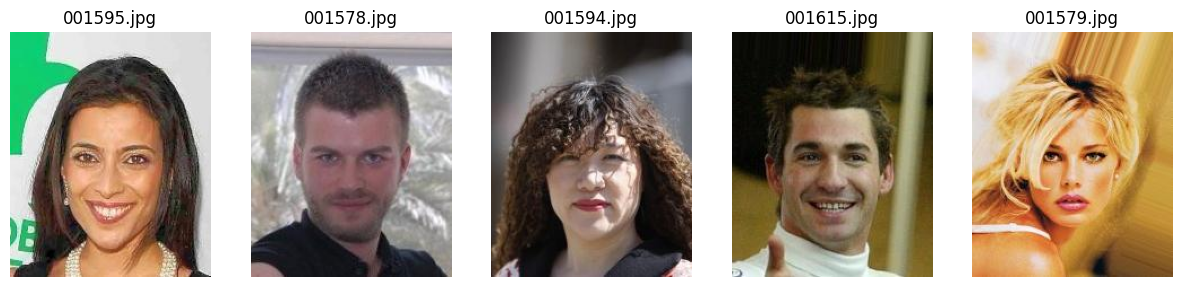

In [7]:
if os.path.exists(images_dir_test):
    image_files = os.listdir(images_dir_test)
    print(f"Found {len(image_files)} images.")
else:
    print("Images directory not found. Check the path.")

plt.figure(figsize=(15, 10))
num_images_to_show = 5
for i, image_name in enumerate(image_files[:num_images_to_show]):
    image_path = os.path.join(images_dir_test, image_name)
    if os.path.exists(image_path):
        image = Image.open(image_path)
        plt.subplot(1, num_images_to_show, i + 1)
        plt.imshow(image)
        plt.title(image_name)
        plt.axis('off')
    else:
        print(f"Image not found: {image_path}")
plt.show()

VIEWING RESIZED IMAGES IN THE DATASET WHILE CONFIRMING THE TOTAL NUMBER OF IMAGES IN THE DATASET USING THE RANDOM LIBRARY TO VIEW IMAGES FROM THE DATASET AT RANDOM

Total images: 4079


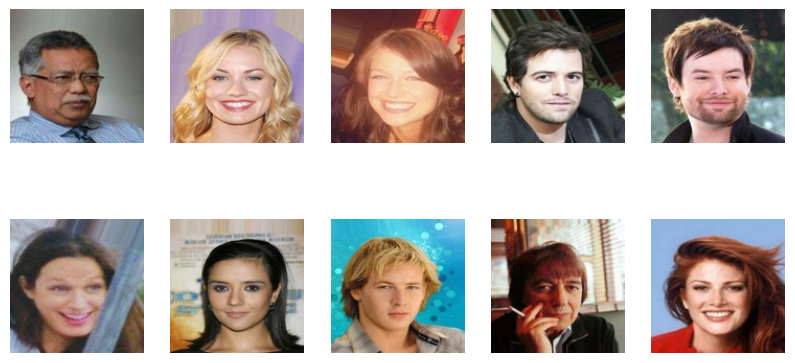

In [8]:
image_files = [x for x in os.listdir(images_dir) if x.lower().endswith(('png', 'jpg', 'jpeg'))]
print(f"Total images: {len(image_files)}")
plt.figure(figsize=(10, 5))
sample_images = np.random.choice(image_files, 10, replace=False)
for idx, image in enumerate(sample_images):
    img = Img.open(os.path.join(images_dir, image)).resize((128, 128))
    plt.subplot(2, 5, idx + 1)
    plt.imshow(img)
    plt.axis('off')
plt.show()


DATASET PREPROCESSING

Check the first few image paths to ensure correctness and preparing the dataset

In [9]:
attributes = pd.read_csv(attributes_file)
attributes.replace(-1, 0, inplace=True)

happy_images = attributes[attributes['Smiling'] == 1]['image_id'].tolist()

datagen = ImageDataGenerator(rescale=1./255)

def load_images(image_files, image_dir, img_size=(64, 64)):
    loaded_images = []
    for img in image_files:
        img_path = os.path.join(image_dir, img)
        if os.path.exists(img_path):
            image = Image.open(img_path)
            image = image.resize(img_size)
            loaded_images.append(np.array(image))
    return np.array(loaded_images)

train_images = load_images(happy_images, images_dir)

if len(train_images) == 0:
    raise FileNotFoundError("No valid images found in the specified directory.")

train_images = train_images.astype('float32') / 255.0
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_images)).batch(16)

DEFINE THE VAE MODEL

Defining the VAE model, Encoder,Decoder, the loss function and Train the model

In [10]:
from tensorflow.keras import layers, Model




latent_dim = 64

class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

inputs = layers.Input(shape=(64, 64, 3))
x = layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')(inputs)
x = layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation='relu')(x)
z_mean = layers.Dense(latent_dim, name='z_mean')(x)
z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)
z = Sampling()([z_mean, z_log_var])
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')

latent_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(16 * 16 * 64, activation='relu')(latent_inputs)
x = layers.Reshape((16, 16, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
outputs = layers.Conv2DTranspose(3, 3, activation='sigmoid', padding='same')(x)
decoder = Model(latent_inputs, outputs, name='decoder')

outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae')

reconstruction_loss = tf.keras.losses.mse(inputs, outputs) * 64 * 64 * 3
kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
kl_loss = tf.reduce_mean(kl_loss) * -0.5
vae_loss = tf.reduce_mean(reconstruction_loss + kl_loss)

vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

vae.fit(train_dataset, epochs=30)

DISPLAY RANDOMLY GENERATED IMAGES

In [ ]:
def display_images(images, title=''):
    plt.figure(figsize=(10, 10))
    for i in range(images.shape[0]):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i])
        plt.title(title)
        plt.axis('off')
    plt.show()


random_latent_vectors = tf.random.normal(shape=(25, latent_dim))
generated_images = decoder.predict(random_latent_vectors)

generated_images *= 255
generated_images = np.round(generated_images).astype(np.uint8)

display_images(generated_images, 'Generated Happy Faces')

IMPROVING THE TRAINING AND DISPLAYING THE REAL IMAGE AND GENERATED IMAGES SIDE BY SIDE

IMPROVING THE MODEL BY SAMPLING 2000 IMAGES

1. Enhancing the model by adding more convolutional layers with increasing filters to capture more complex features.



In [ ]:
attributes = pd.read_csv(attributes_file)
attributes.replace(-1, 0, inplace=True)

happy_images = attributes[attributes['Smiling'] == 1]['image_id'].tolist()

def load_images(image_files, image_dir, img_size=(64, 64)):
    loaded_images = []
    for img in image_files:
        img_path = os.path.join(image_dir, img)
        if os.path.exists(img_path):
            image = Image.open(img_path)
            image = image.resize(img_size)
            loaded_images.append(np.array(image))
    return np.array(loaded_images)

happy_image_samples = happy_images[:2000]  # Adjust based on memory capacity
train_images = load_images(happy_image_samples, images_dir)

if len(train_images) == 0:
    raise FileNotFoundError("No valid images found in the specified directory.")

train_images = train_images.astype('float32') / 255.0
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_images)).shuffle(buffer_size=1024).batch(32)

latent_dim = 128

class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

inputs = layers.Input(shape=(64, 64, 3))
x = layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')(inputs)
x = layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Conv2D(128, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Conv2D(256, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
z_mean = layers.Dense(latent_dim, name='z_mean')(x)
z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)
z = Sampling()([z_mean, z_log_var])
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')

latent_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(8 * 8 * 128, activation='relu')(latent_inputs)
x = layers.Reshape((8, 8, 128))(x)
x = layers.Conv2DTranspose(128, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
outputs = layers.Conv2DTranspose(3, 3, activation='sigmoid', padding='same')(x)
decoder = Model(latent_inputs, outputs, name='decoder')


outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae')


reconstruction_loss = tf.keras.losses.mse(inputs, outputs) * 64 * 64 * 3
kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
kl_loss = tf.reduce_mean(kl_loss) * -0.5
vae_loss = tf.reduce_mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)

initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.96, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
vae.compile(optimizer=optimizer)

class PlotGeneratedImagesCallback(tf.keras.callbacks.Callback):
    def __init__(self, model, sample_images):
        self.model = model
        self.sample_images = sample_images

    def on_epoch_end(self, epoch, logs=None):
        encoded_images = encoder.predict(self.sample_images)
        generated_images = decoder.predict(encoded_images[2])
        plot_comparison(self.sample_images, generated_images)

def plot_comparison(real_images, generated_images, num_images=10):
    plt.figure(figsize=(20, 4))
    for i in range(num_images):

        ax = plt.subplot(2, num_images, i + 1)
        plt.imshow(real_images[i].reshape(64, 64, 3))
        plt.title("Real")
        plt.axis("off")


        ax = plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(generated_images[i].reshape(64, 64, 3))
        plt.title("Generated")
        plt.axis("off")
    plt.show()


num_visualize = 10
visualize_images = train_images[:num_visualize]


plot_callback = PlotGeneratedImagesCallback(vae, visualize_images)
vae.fit(train_dataset, epochs=30, callbacks=[plot_callback])


IMPROVING THE MODEL OVER THE WHOLE TRAIN DATASET

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model
import os
import pandas as pd
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


base_dir_train = '/content/drive/My Drive/newhuman1/train'
images_dir = os.path.join(base_dir_train, 'img_align_celeba')
attributes_file = os.path.join(base_dir_train, 'list_attr_celeba.csv')


attributes = pd.read_csv(attributes_file)
attributes.replace(-1, 0, inplace=True)


happy_images = attributes[attributes['Smiling'] == 1]['image_id'].tolist()


def load_images(image_files, image_dir, img_size=(64, 64)):
    loaded_images = []
    for img in image_files:
        img_path = os.path.join(image_dir, img)
        if os.path.exists(img_path):
            image = Image.open(img_path)
            image = image.resize(img_size)
            loaded_images.append(np.array(image))
    return np.array(loaded_images)


train_images = load_images(happy_images, images_dir)


if len(train_images) == 0:
    raise FileNotFoundError("No valid images found in the specified directory.")


train_images = train_images.astype('float32') / 255.0
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_images)).shuffle(buffer_size=1024).batch(32)


latent_dim = 128

class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon


inputs = layers.Input(shape=(64, 64, 3))
x = layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')(inputs)
x = layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Conv2D(128, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Conv2D(256, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
z_mean = layers.Dense(latent_dim, name='z_mean')(x)
z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)
z = Sampling()([z_mean, z_log_var])
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')


latent_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(8 * 8 * 128, activation='relu')(latent_inputs)
x = layers.Reshape((8, 8, 128))(x)
x = layers.Conv2DTranspose(128, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
outputs = layers.Conv2DTranspose(3, 3, activation='sigmoid', padding='same')(x)
decoder = Model(latent_inputs, outputs, name='decoder')


outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae')


reconstruction_loss = tf.keras.losses.mse(inputs, outputs) * 64 * 64 * 3
kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
kl_loss = tf.reduce_mean(kl_loss) * -0.5
vae_loss = tf.reduce_mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)


initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.96, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
vae.compile(optimizer=optimizer)


class PlotGeneratedImagesCallback(tf.keras.callbacks.Callback):
    def __init__(self, model, sample_images):
        self.model = model
        self.sample_images = sample_images

    def on_epoch_end(self, epoch, logs=None):
        encoded_images = encoder.predict(self.sample_images)
        generated_images = decoder.predict(encoded_images[2])
        plot_comparison(self.sample_images, generated_images)

def plot_comparison(real_images, generated_images, num_images=10):
    plt.figure(figsize=(20, 4))
    for i in range(num_images):

        ax = plt.subplot(2, num_images, i + 1)
        plt.imshow(real_images[i].reshape(64, 64, 3))
        plt.title("Real")
        plt.axis("off")


        ax = plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(generated_images[i].reshape(64, 64, 3))
        plt.title("Generated")
        plt.axis("off")
    plt.show()


num_visualize = 10
visualize_images = train_images[:num_visualize]


plot_callback = PlotGeneratedImagesCallback(vae, visualize_images)
vae.fit(train_dataset, epochs=30, callbacks=[plot_callback])


if os.path.exists(images_dir):
    image_files = os.listdir(images_dir)
    print(f"Found {len(image_files)} images.")
else:
    print("Images directory not found. Check the path.")

plt.figure(figsize=(15, 10))
num_images_to_show = 5
for i, image_name in enumerate(image_files[:num_images_to_show]):
    image_path = os.path.join(images_dir, image_name)
    if os.path.exists(image_path):
        image = Image.open(image_path)
        plt.subplot(1, num_images_to_show, i + 1)
        plt.imshow(image)
        plt.title(image_name)
        plt.axis('off')
    else:
        print(f"Image not found: {image_path}")
plt.show()


TESTING

In [ ]:
attributes_test = pd.read_csv(attributes_file_test)
attributes_test.replace(-1, 0, inplace=True)

happy_images_test = attributes_test[attributes_test['Smiling'] == 1]['image_id'].tolist()

def load_images(image_files, image_dir, img_size=(64, 64)):
    loaded_images = []
    for img in image_files:
        img_path = os.path.join(image_dir, img)
        if os.path.exists(img_path):
            image = Image.open(img_path)
            image = image.resize(img_size)
            loaded_images.append(np.array(image))
    return np.array(loaded_images)

test_images = load_images(happy_images_test, images_dir_test)

if len(test_images) == 0:
    raise FileNotFoundError("No valid images found in the specified directory.")

test_images = test_images.astype('float32') / 255.0
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_images)).shuffle(buffer_size=1024).batch(32)

latent_dim = 128

class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

inputs = layers.Input(shape=(64, 64, 3))
x = layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')(inputs)
x = layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Conv2D(128, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Conv2D(256, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
z_mean = layers.Dense(latent_dim, name='z_mean')(x)
z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)
z = Sampling()([z_mean, z_log_var])
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')

latent_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(8 * 8 * 128, activation='relu')(latent_inputs)  # Adjust the dense layer to match the desired output size
x = layers.Reshape((8, 8, 128))(x)
x = layers.Conv2DTranspose(128, 3, activation='relu', strides=2, padding='same')(x)  # Up to 16x16
x = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)   # Up to 32x32
x = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)   # Up to 64x64
outputs = layers.Conv2DTranspose(3, 3, activation='sigmoid', padding='same')(x)
decoder = Model(latent_inputs, outputs, name='decoder')

outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae')

reconstruction_loss = tf.keras.losses.mse(inputs, outputs) * 64 * 64 * 3
kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
kl_loss = tf.reduce_mean(kl_loss) * -0.5
vae_loss = tf.reduce_mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)

initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.96, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
vae.compile(optimizer=optimizer)

class PlotGeneratedImagesCallback(tf.keras.callbacks.Callback):
    def __init__(self, model, sample_images):
        self.model = model
        self.sample_images = sample_images

    def on_epoch_end(self, epoch, logs=None):
        encoded_images = encoder.predict(self.sample_images)
        generated_images = decoder.predict(encoded_images[2])
        plot_comparison(self.sample_images, generated_images)

def plot_comparison(real_images, generated_images, num_images=10):
    plt.figure(figsize=(20, 4))
    for i in range(num_images):
        ax = plt.subplot(2, num_images, i + 1)
        plt.imshow(real_images[i].reshape(64, 64, 3))
        plt.title("Real")
        plt.axis("off")


        ax = plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(generated_images[i].reshape(64, 64, 3))
        plt.title("Generated")
        plt.axis("off")
    plt.show()


num_visualize = 10
visualize_images = test_images[:num_visualize]

plot_callback = PlotGeneratedImagesCallback(vae, visualize_images)
vae.fit(test_dataset, epochs=30, callbacks=[plot_callback])

if os.path.exists(images_dir_test):
    image_files = os.listdir(images_dir_test)
    print(f"Found {len(image_files)} images.")
else:
    print("Images directory not found. Check the path.")

plt.figure(figsize=(15, 10))
num_images_to_show = 5
for i, image_name in enumerate(image_files[:num_images_to_show]):
    image_path = os.path.join(images_dir_test, image_name)
    if os.path.exists(image_path):
        image = Image.open(image_path)
        plt.subplot(1, num_images_to_show, i + 1)
        plt.imshow(image)
        plt.title(image_name)
        plt.axis('off')
    else:
        print(f"Image not found: {image_path}")
plt.show()

df_landmarks = pd.read_csv(landmarks_file_test)
df_bbox = pd.read_csv(bbox_file_test)
df_partition = pd.read_csv(partition_file_test)
df_attributes = pd.read_csv(attributes_file_test)

print("Loaded test data files:")
print(df_landmarks.head())
print(df_bbox.head())
print(df_partition.head())
print(df_attributes.head())
